## Discrete-time competitive Beverton-Holt model

\begin{align}
N_{1,t+1}=\dfrac{r_1N_{1,t}}{1+a_{11}N_{1,t}+a_{12}N_{2,t}} \\
N_{2,t+1}=\dfrac{r_2N_{2,t}}{1+a_{22}N_{2,t}+a_{21}N_{1,t}}
\tag{1}
\end{align}

### Reference: 

Yenni, Glenda Marie, Peter Adler, and S. K. Morgan Ernest. 2012. Strong self-limitation promotes the persistence of rare species. Ecology. 93 (3) pp. 456 – 461. http://doi.org/10.1890/11-1087.1

### Code:

http://doi.org/10.1890/11-1087.1

## Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Initialization and definition of variables, bounds, arrays, etc.

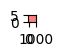

In [2]:
# Variables for the time series
tmax = 1000
time = np.linspace(1,tmax,tmax)
y1 = np.zeros(tmax)
y2 = np.zeros(tmax)
y1[0], y2[0] = 5, 5 #0.4, 0.6 # initial conditions
final_abundance1=np.zeros(0)
final_growth_rate1=np.zeros(0)
final_abundance2=np.zeros(0)
final_growth_rate2=np.zeros(0)
cov=np.zeros(0)

growth_rate1 = np.zeros(tmax)
growth_rate2 = np.zeros(tmax)
positive_growth_rate1=np.zeros(0)
positive_growth_rate2=np.zeros(0)
negative_growth_rate1=np.zeros(0)
negative_growth_rate2=np.zeros(0)
zero_growth_rate1=np.zeros(0)
zero_growth_rate2=np.zeros(0)
positive_final_abundance1=np.zeros(0)
positive_final_abundance2=np.zeros(0)
negative_final_abundance1=np.zeros(0)
negative_final_abundance2=np.zeros(0)
zero_final_abundance1=np.zeros(0)
zero_final_abundance2=np.zeros(0)

# Variables for the per capita growth rate
ymax = 50
y1_SR = np.zeros(ymax)
y2_SR = np.zeros(ymax)
growth_rate1_SR = np.zeros(ymax)
growth_rate2_SR = np.zeros(ymax)

# Dummy plot, not important
fig, ax = plt.subplots(figsize=(0.1, 0.1))
ax.plot(time, y1, alpha=0.5,linestyle="--", linewidth=10, markersize=12, color="r")
plt.rcParams.update({'font.size': 30})

## Test

In [3]:
r1=10
r2=10
a11=0.1
a12=0.1
a21=0.3
a22=0.1

## Strength of stabilization
S1=r2/(1+(a12/a22)*(r2-1))
S2=r1/(1+(a21/a11)*(r1-1))                     
## Discrete-time competitive Beverton-Holt model
for i in range(tmax-1):
    growth_rate1[i] = r1 / ( 1 + a11 * y1[i] + a12 * y2[i] )
    growth_rate2[i] = r2 / ( 1 + a22 * y2[i] + a21 * y1[i] )
    y1[i+1] = y1[i] * growth_rate1[i]
    y2[i+1] = y2[i] * growth_rate2[i]
S=np.array([S1,S2])
abundance=np.array([y1[-1],y2[-1]])
cov=np.append(cov,np.cov(abundance, S)[0][1])
final_abundance1=np.append(final_abundance1,y1[-1])
final_abundance2=np.append(final_abundance2,y2[-1])
final_growth_rate1=np.append(final_growth_rate1,growth_rate1[-2])
final_growth_rate2=np.append(final_growth_rate2,growth_rate2[-2])

In [4]:
## Strength of stabilization
S1=r2/(1+(a12/a22)*(r2-1))
S2=r1/(1+(a21/a11)*(r1-1))                     
## Discrete-time competitive Beverton-Holt model
for i in range(tmax-1):
    y1[i+1] = (r1-1-(a12/a22)*(r2-1))/(a11-a21*a12/a22)
    y2[i+1] = (r2-1-(a21/a11)*(r1-1))/(a22-a21*a12/a11)
S=np.array([S1,S2])
abundance=np.array([y1[-1],y2[-1]])
cov=np.append(cov,np.cov(abundance, S)[0][1])
final_abundance1=np.append(final_abundance1,y1[-1])
final_abundance2=np.append(final_abundance2,y2[-1])

## Time series

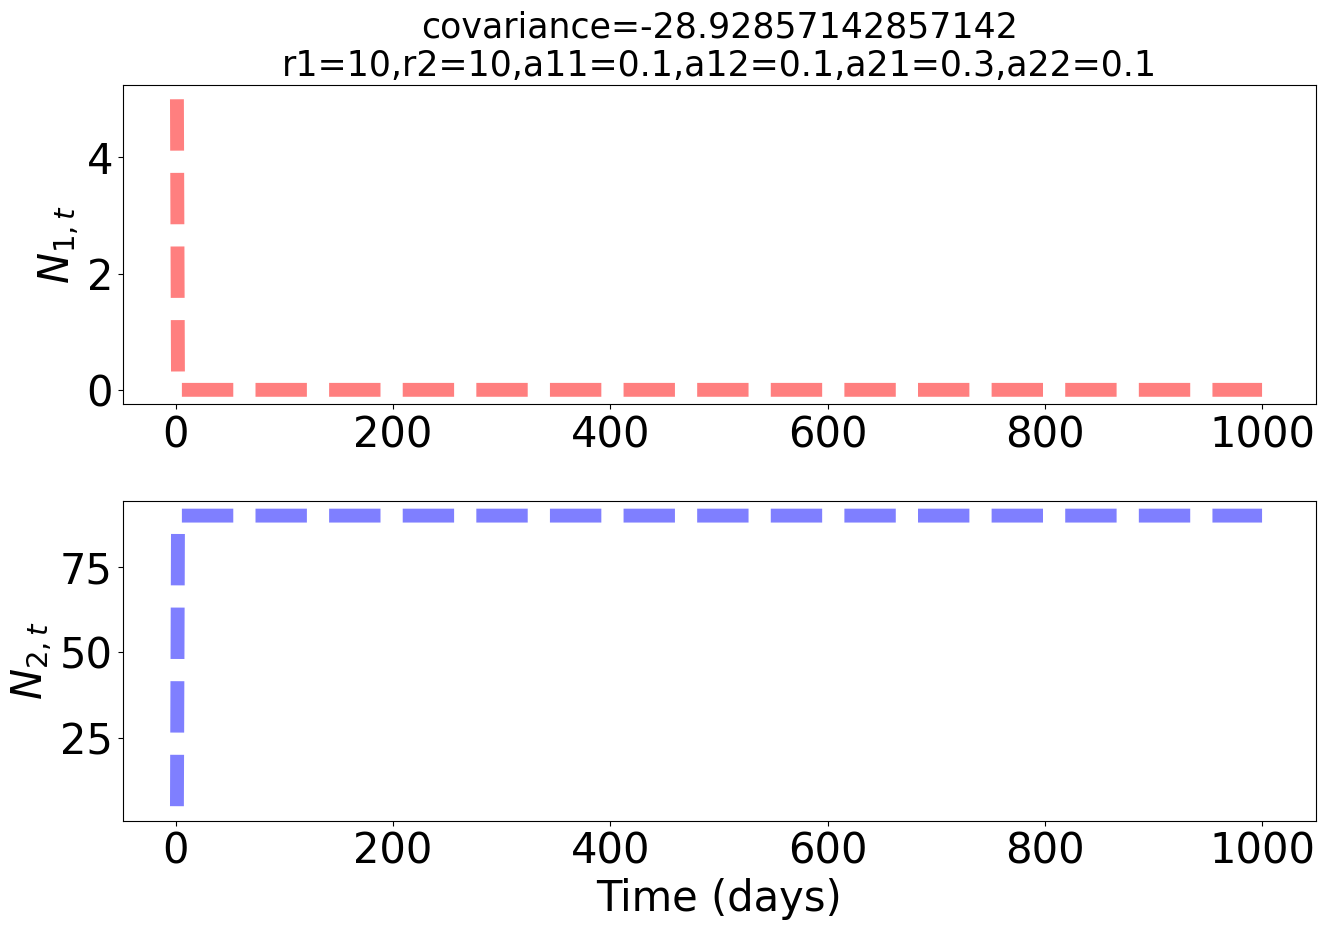

In [5]:
fig, (ax1,ax2) = plt.subplots(2,figsize=(14, 10))
ax1.plot(time, y1, alpha=0.5,linestyle="--", linewidth=10, markersize=12, color="r", label='S1='+str(S1))
ax1.set(ylabel='$N_{1,t}$')
ax2.plot(time, y2, alpha=0.5,linestyle="--", linewidth=10, markersize=12, color="b", label='S2='+str(S2))
ax2.set(xlabel='Time (days)', ylabel='$N_{2,t}$')
plt.rcParams.update({'font.size': 30})
ax1.set_title('covariance='+str(np.cov(abundance, S)[0][1])+'\n'+'r1='+str(r1)+',r2='+str(r2)+',a11='+str(a11)+',a12='+str(a12)+',a21='+str(a21)+',a22='+str(a22), fontsize=25)
plt.tight_layout()
#plt.savefig('img/time_series_r1_'+str(r1)+'_r2_'+str(r2)+'_a11_'+str(a11)+'_a12_'+str(a12)+'_a21_'+str(a21)+'_a22_'+str(a22)+'.png', format='png', dpi=50)
plt.show()

In [6]:
total = final_abundance1 + final_abundance2
relative_abundance1 = final_abundance1 / total
relative_abundance2 = final_abundance2 / total

relative_abundance1[-1]

-0.0

## Covariance: strength of stabilization and final population

df=open('annplant_2spp_det1.txt','w')
df.write("r1" + "\t" + "r2" + "\t" + "a11" + "\t" + "a12" + "\t" + "a21" + "\t" + "a22" + "\t" + "N1" + "\t" + "N2" + "\t" + "N1rel" + "\t" + "N2rel" + "\t" + "growth1" + "\t" + "growth2" + "\t" + "log growth1" + "\t" + "log growth2" + "\t" + "S1" + "\t" + "S2" + "\n")
for r1 in range(10,21,1):#(15,20,1)
    for r2 in range(10,21,1):#(11,20,1)
        for a11 in np.arange(0.1,0.6,0.2):#(0.7,3,0.1)
            for a12 in np.arange(0.1,1.2,0.2):
                for a21 in np.arange(0.1,1.2,0.2):
                    for a22 in np.arange(0.1,1.2,0.2):
                        ## Strength of stabilization
                        S1=r2/(1+(a12/a22)*(r2-1))
                        S2=r1/(1+(a21/a11)*(r1-1))                     
                        ## Discrete-time competitive Beverton-Holt model
                        for i in range(tmax-1):
                            growth_rate1[i] = r1 / ( 1 + a11 * y1[i] + a12 * y2[i] )
                            growth_rate2[i] = r2 / ( 1 + a22 * y2[i] + a21 * y1[i] )
                            y1[i+1] = y1[i] * growth_rate1[i]
                            y2[i+1] = y2[i] * growth_rate2[i]
                        S=np.array([S1,S2])
                        abundance=np.array([y1[-1],y2[-1]])
                        cov=np.append(cov,np.cov(abundance, S)[0][1])
                        final_abundance1=np.append(final_abundance1,y1[-1])
                        final_abundance2=np.append(final_abundance2,y2[-1])
                        final_growth_rate1=np.append(final_growth_rate1,growth_rate1[-2])
                        final_growth_rate2=np.append(final_growth_rate2,growth_rate2[-2])
                        df.write(str(r1) + "\t" + str(r2) + "\t" + str(a11) + "\t" + str(a12) + "\t" + str(a21) + "\t" + str(a22) + "\t" + str(y1[-1]) + "\t" + str(y2[-1]) + "\t" + str(y1[-1]/(y1[-1]+y2[-1])) + "\t" + str(y2[-1]/(y1[-1]+y2[-1])) + "\t" + str((y1[-1]-y1[-2])) + "\t" + str((y2[-1]-y2[-2])) + "\t" + str(np.log(y1[-1]-y1[-2])) + "\t" + str(np.log(y2[-1]-y2[-2])) + "\t" + str(S1) + "\t" + str(S2))
                        df.write('\n')
df.close()

In [7]:
df=open('annplant_2spp_det1.txt','w')
df.write("r1" + "\t" + "r2" + "\t" + "a11" + "\t" + "a12" + "\t" + "a21" + "\t" + "a22" + "\t" + "N1" + "\t" + "N2" + "\t" + "N1rel" + "\t" + "N2rel" + "\t" + "growth1" + "\t" + "growth2" + "\t" + "log growth1" + "\t" + "log growth2" + "\t" + "S1" + "\t" + "S2" + "\n")
for r1 in range(10,21,1):#(15,20,1)
    for r2 in range(10,21,1):#(11,20,1)
        for a11 in np.arange(0.1,0.6,0.2):#(0.7,3,0.1)
            for a12 in np.arange(0.1,1.2,0.2):
                for a21 in np.arange(0.1,1.2,0.2):
                    for a22 in np.arange(0.1,1.2,0.2):
                        ## Strength of stabilization
                        S1=r2/(1+(a12/a22)*(r2-1))
                        S2=r1/(1+(a21/a11)*(r1-1))
                        ## Discrete-time competitive Beverton-Holt model
                        for i in range(tmax-1):
                            y1[i+1] = (r1-1-(a12/a22)*(r2-1))/(a11-a21*a12/a22)
                            y2[i+1] = (r2-1-(a21/a11)*(r1-1))/(a22-a21*a12/a11)
                        S=np.array([S1,S2])
                        abundance=np.array([y1[-1],y2[-1]])
                        cov=np.append(cov,np.cov(abundance, S)[0][1])
                        final_abundance1=np.append(final_abundance1,y1[-1])
                        final_abundance2=np.append(final_abundance2,y2[-1])
#                        final_growth_rate1=np.append(final_growth_rate1,growth_rate1[-2])
#                        final_growth_rate2=np.append(final_growth_rate2,growth_rate2[-2])
                        df.write(str(r1) + "\t" + str(r2) + "\t" + str(a11) + "\t" + str(a12) + "\t" + str(a21) + "\t" + str(a22) + "\t" + str(y1[-1]) + "\t" + str(y2[-1]) + "\t" + str(y1[-1]/(y1[-1]+y2[-1])) + "\t" + str(y2[-1]/(y1[-1]+y2[-1])) + "\t" + str((y1[-1]-y1[-2])) + "\t" + str((y2[-1]-y2[-2])) + "\t" + str(np.log(y1[-1]-y1[-2])) + "\t" + str(np.log(y2[-1]-y2[-2])) + "\t" + str(S1) + "\t" + str(S2))
                        df.write('\n')
df.close()

/tmp/ipykernel_37184/2340841065.py:23: RuntimeWarning: invalid value encountered in double_scalars
  df.write(str(r1) + "\t" + str(r2) + "\t" + str(a11) + "\t" + str(a12) + "\t" + str(a21) + "\t" + str(a22) + "\t" + str(y1[-1]) + "\t" + str(y2[-1]) + "\t" + str(y1[-1]/(y1[-1]+y2[-1])) + "\t" + str(y2[-1]/(y1[-1]+y2[-1])) + "\t" + str((y1[-1]-y1[-2])) + "\t" + str((y2[-1]-y2[-2])) + "\t" + str(np.log(y1[-1]-y1[-2])) + "\t" + str(np.log(y2[-1]-y2[-2])) + "\t" + str(S1) + "\t" + str(S2))
/tmp/ipykernel_37184/2340841065.py:23: RuntimeWarning: divide by zero encountered in log
  df.write(str(r1) + "\t" + str(r2) + "\t" + str(a11) + "\t" + str(a12) + "\t" + str(a21) + "\t" + str(a22) + "\t" + str(y1[-1]) + "\t" + str(y2[-1]) + "\t" + str(y1[-1]/(y1[-1]+y2[-1])) + "\t" + str(y2[-1]/(y1[-1]+y2[-1])) + "\t" + str((y1[-1]-y1[-2])) + "\t" + str((y2[-1]-y2[-2])) + "\t" + str(np.log(y1[-1]-y1[-2])) + "\t" + str(np.log(y2[-1]-y2[-2])) + "\t" + str(S1) + "\t" + str(S2))
/tmp/ipykernel_37184/234084106

In [8]:
y1

array([ 5., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0

In [9]:
y1[-1]

-0.0

In [10]:
(y1[-1]-y1[-2])

0.0

In [11]:
len(y1[+1:])

999

In [12]:
len(y1[:-1])

999

# Test graph

In [13]:
#TP = final_abundance1 + final_abundance2
#relative_abundance1 = final_abundance1 / TP
#relative_abundance2 = final_abundance2 / TP

TP = final_abundance1 + final_abundance2

Nfreq1 = (y1[+1:]-y1[:-1]) / TP
Nfreq2 = (y2[+1:]-y2[:-1]) / TP

growth_rate_1 = np.log(y1[+1:]-y1[:-1])
growth_rate_2 = np.log(y2[+1:]-y2[:-1])

/tmp/ipykernel_37184/2759372226.py:5: RuntimeWarning: invalid value encountered in add
  TP = final_abundance1 + final_abundance2


ValueError: operands could not be broadcast together with shapes (999,) (78409,) 

In [ ]:
len(relative_abundance1)

In [ ]:
len(growth_rate_1)

In [ ]:
N = np.linspace(1,ymax,ymax)
fig, (ax1,ax2) = plt.subplots(2,figsize=(14, 10))
# Finite Growth Rate
# Species 1
ax1.plot(relative_abundance1, growth_rate_1, alpha=0.5,linestyle="dotted", linewidth=10, markersize=12, color="r")
ax1.axhline(y=1, color='grey', linestyle='-')
ax1.set(ylabel='$N_{1,t+1}/N_{1,t}$')
# Species 2
ax2.plot(relative_abundance2, growth_rate_2, alpha=0.5,linestyle="dashed", linewidth=10, markersize=12, color="b")
ax2.axhline(y=1, color='grey', linestyle='-')
ax2.set(ylabel='$N_{2,t+1}/N_{2,t}$')